# MTCNN Architecture
Multi-Task Cascaded Convolutional Neural Network sample

```
pip install mtcnn
```

In [1]:
!pip show mtcnn

Name: mtcnn
Version: 0.0.9
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: c:\applications\miniconda3\envs\tensorflow-gpu\lib\site-packages
Requires: 
Required-by: 


In [2]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.0.9


{'box': [186, 71, 87, 115], 'confidence': 0.9994562268257141, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}
{'box': [368, 75, 108, 138], 'confidence': 0.998593270778656, 'keypoints': {'left_eye': (392, 133), 'right_eye': (441, 140), 'nose': (407, 170), 'mouth_left': (388, 180), 'mouth_right': (438, 185)}}


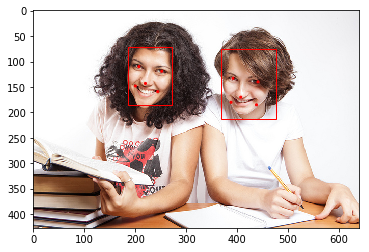

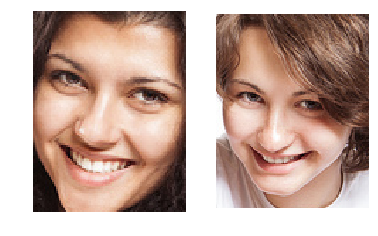

In [12]:
import cv2
from cv2 import imread
from matplotlib import pyplot
from matplotlib.patches import Circle, Rectangle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(pixels, result_list):
    # plot the image
    pyplot.imshow(pixels)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            
    # show the plot
    pyplot.show()

    
# draw each face separately
def draw_faces(pixels, result_list):
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(pixels[y1:y2, x1:x2])
    # show the plot
    pyplot.show()

# load image from file
filename = 'test1.jpg'
pixels = imread(filename)
pixels = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)

# create the detector, using default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)
    
# display faces on the original image
draw_image_with_boxes(pixels, faces)
draw_faces(pixels, faces)